## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data_df = pd.merge(study_results, mouse_metadata, how='outer', on=['Mouse ID', 'Mouse ID'])

# Modify header
merged_data_df = merged_data_df.rename(columns={'Age_months': 'Age (months)'})

# Display the data table for preview
merged_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age (months),Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [3]:
# Checking the number of mice.
total_mice = len(merged_data_df['Mouse ID'].unique())
total_mice

249

In [4]:
# Find the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice = merged_data_df.duplicated(subset=['Mouse ID', 'Timepoint'])

# Locate all the duplicated mice and return Mouse ID
duplicated_mice_ID = merged_data_df.loc[duplicated_mice, 'Mouse ID'].unique()

In [5]:
# Get all the data for the duplicate mouse ID. 
duplicated_mice_ID_data = merged_data_df.loc[duplicated_mice, :]
duplicated_mice_ID_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age (months),Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
analysis_data_df = merged_data_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')

# Store analysis starting data file
analysis_data_df.to_csv('data/analysis_data.csv', index=False, header=True)

In [7]:
# Checking the number of mice in the clean DataFrame.
total_mice = len(analysis_data_df['Mouse ID'].unique())
total_mice

249

## Summary Statistics

In [8]:
# Generate a summary statistics table of the tumor volume for each regimen
drug_regimen_gp = analysis_data_df.groupby('Drug Regimen')

# Mean
mean = drug_regimen_gp['Tumor Volume (mm3)'].mean()

# Median
median = drug_regimen_gp['Tumor Volume (mm3)'].median()

# Variance 
var = drug_regimen_gp['Tumor Volume (mm3)'].var()

# Standard deviation
std = drug_regimen_gp['Tumor Volume (mm3)'].std()

# SEM: return unbiased stardard error of mean 
sem = drug_regimen_gp['Tumor Volume (mm3)'].sem()

# Combine all statistics computation together
summary_statistics_df = pd.DataFrame({
    'Mean': mean,
    'Median': median,
    'Variance': var,
    'Standard deviation': std,
    'SEM': sem
})

# Present Summary Statistics
summary_statistics_df

,Mean,Median,Variance,Standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [ ]:
# Calculate number of mice per Drug Regimen using for both bar charts in different methods 
no_mice_per_regimen = drug_regimen_gp['Mouse ID'].count()

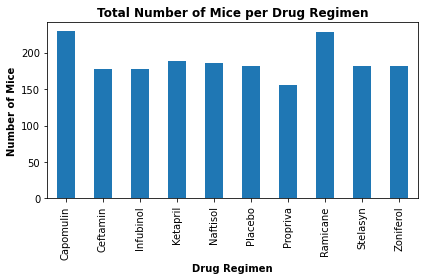

In [17]:
# **Using pandas** Generate a bar plot showing the total number of mice for each treatment 
pd_bar_mice_per_regimen = no_mice_per_regimen.plot(kind='bar')

# Set x/y label, title and show the bar graph
pd_bar_mice_per_regimen.set_title(label='Total Number of Mice per Drug Regimen', fontweight = 'bold')
pd_bar_mice_per_regimen.set_xlabel('Drug Regimen', fontweight = 'bold')
pd_bar_mice_per_regimen.set_ylabel('Number of Mice', fontweight = 'bold')
plt.tight_layout()
plt.show()

# Save bar graph to Images folder
pd_bar_mice_per_regimen.figure.savefig('Images/pd_bar_mice_per_regimen.png')

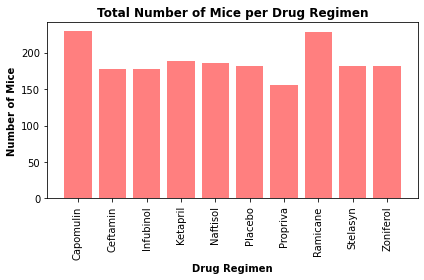

In [30]:
# **Using pyplot** Generate a bar plot showing the total number of mice for each treatment 
# Set x axis
x_axis_regimen = np.arange(len(no_mice_per_regimen))
regimen_name = list(no_mice_per_regimen.index.values)
 
# Create bar chart
plt.bar(x_axis_regimen, no_mice_per_regimen, color='red', alpha=0.5)

# Set x/y label, title and show the bar graph
plt.xticks(x_axis_regimen, regimen_name, rotation='vertical')
plt.title('Total Number of Mice per Drug Regimen', fontweight = 'bold')
plt.xlabel('Drug Regimen', fontweight = 'bold')
plt.ylabel('Number of Mice', fontweight = 'bold')
plt.tight_layout()
plt.show()

# Save bar graph to Images folder
pd_bar_mice_per_regimen.figure.savefig('Images/py_bar_mice_per_regimen.png')

In [37]:
# The distribution of female versus male mice
sex_mice = analysis_data_df.groupby('Sex')['Sex'].count()

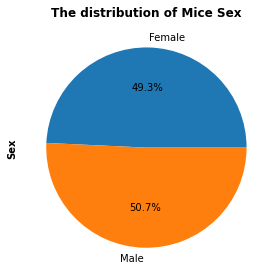

In [40]:
# **Using pandas** Generate a pie plot showing the distribution of female versus male mice
pd_bar_mice_sex = sex_mice.plot(kind='pie', autopct='%1.1f%%')

# Set x/y label, title and show the bar graph
pd_bar_mice_sex.set_title(label='The distribution of Mice Sex', fontweight = 'bold')
pd_bar_mice_sex.set_ylabel('Sex', fontweight = 'bold')
plt.tight_layout()
plt.show()

# Save bar graph to Images folder
pd_bar_mice_sex.figure.savefig('Images/pd_bar_mice_sex.png')


In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
